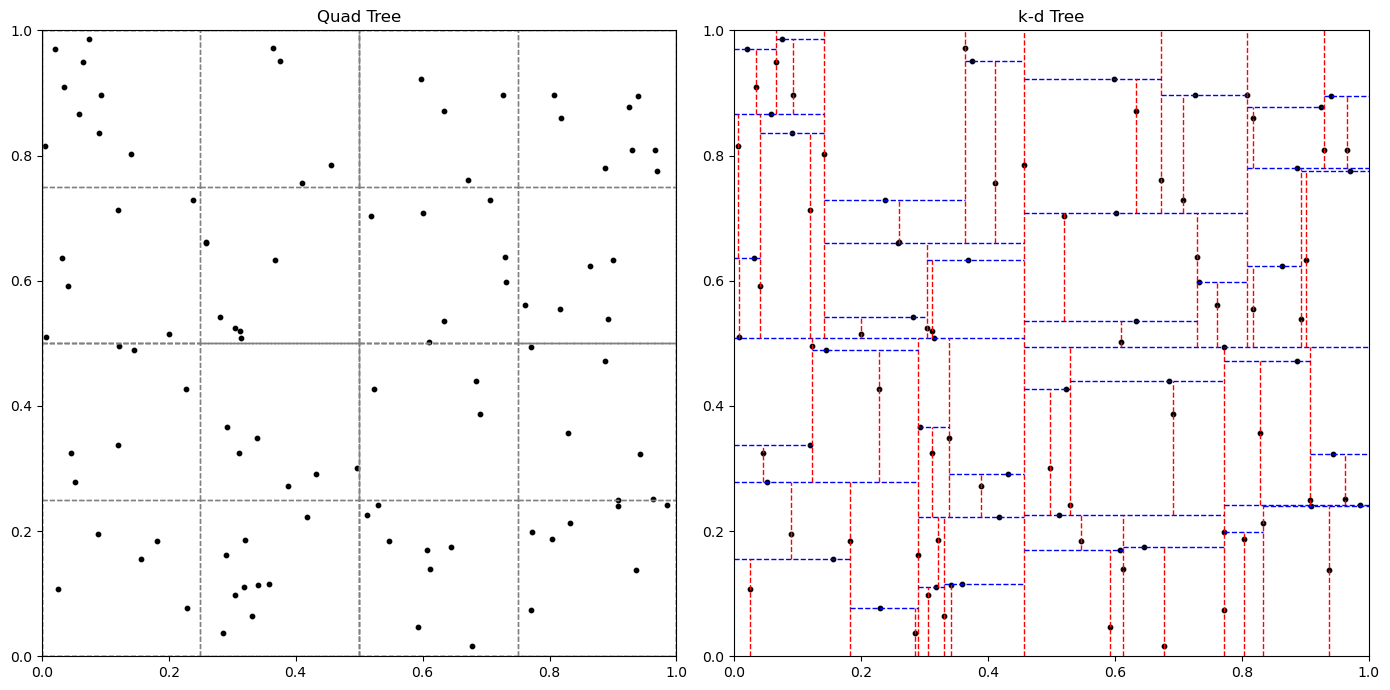

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Create sample points
np.random.seed(42)
points = np.random.rand(100, 2)

# Visualization of Quad Tree
def plot_quad_tree(ax, points, x_min, x_max, y_min, y_max, depth=0, max_depth=2):
    if depth > max_depth:
        return
    # Plot boundary
    ax.plot([x_min, x_min], [y_min, y_max], color="gray", linestyle="--", linewidth=1)
    ax.plot([x_max, x_max], [y_min, y_max], color="gray", linestyle="--", linewidth=1)
    ax.plot([x_min, x_max], [y_min, y_min], color="gray", linestyle="--", linewidth=1)
    ax.plot([x_min, x_max], [y_max, y_max], color="gray", linestyle="--", linewidth=1)
    
    # Midpoints
    x_mid = (x_min + x_max) / 2
    y_mid = (y_min + y_max) / 2

    # Split regions and recurse
    plot_quad_tree(ax, points, x_min, x_mid, y_min, y_mid, depth + 1, max_depth)  # Bottom-left
    plot_quad_tree(ax, points, x_mid, x_max, y_min, y_mid, depth + 1, max_depth)  # Bottom-right
    plot_quad_tree(ax, points, x_min, x_mid, y_mid, y_max, depth + 1, max_depth)  # Top-left
    plot_quad_tree(ax, points, x_mid, x_max, y_mid, y_max, depth + 1, max_depth)  # Top-right

# Visualization of k-d Tree
def plot_kd_tree(ax, points, depth=0, x_min=0, x_max=1, y_min=0, y_max=1):
    if len(points) == 0:
        return
    # Alternating dimension split
    k = 2  # 2D space
    axis = depth % k
    sorted_points = points[points[:, axis].argsort()]
    median_idx = len(sorted_points) // 2
    median_point = sorted_points[median_idx]

    # Plot the split
    if axis == 0:  # Vertical split (x-axis)
        ax.axvline(median_point[0], y_min, y_max, color="red", linestyle="--", linewidth=1)
        plot_kd_tree(ax, sorted_points[:median_idx], depth + 1, x_min, median_point[0], y_min, y_max)
        plot_kd_tree(ax, sorted_points[median_idx + 1 :], depth + 1, median_point[0], x_max, y_min, y_max)
    else:  # Horizontal split (y-axis)
        ax.axhline(median_point[1], x_min, x_max, color="blue", linestyle="--", linewidth=1)
        plot_kd_tree(ax, sorted_points[:median_idx], depth + 1, x_min, x_max, y_min, median_point[1])
        plot_kd_tree(ax, sorted_points[median_idx + 1 :], depth + 1, x_min, x_max, median_point[1], y_max)

# Create plots
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Plot Quad Tree
axs[0].scatter(points[:, 0], points[:, 1], c="black", s=10, label="Points")
plot_quad_tree(axs[0], points, 0, 1, 0, 1)
axs[0].set_title("Quad Tree")
axs[0].set_xlim(0, 1)
axs[0].set_ylim(0, 1)

# Plot k-d Tree
axs[1].scatter(points[:, 0], points[:, 1], c="black", s=10, label="Points")
plot_kd_tree(axs[1], points)
axs[1].set_title("k-d Tree")
axs[1].set_xlim(0, 1)
axs[1].set_ylim(0, 1)

plt.tight_layout()
plt.show()
